In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

# Load and preprocess the dataset

In [7]:
# Load the CSV data into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Stock price predict(Saify)/cleand_SANDP500.csv')

# Display the first few rows of the data to get an initial view
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2002-04-01,1147.39,1147.84,1132.87,1146.54,1146.54,1.050900e+09
1,2003-04-01,848.18,861.28,847.85,858.48,858.48,1.461600e+09
2,2004-04-01,1126.21,1135.67,1126.20,1132.17,1132.17,1.560700e+09
3,2005-04-01,1180.59,1189.80,1169.91,1172.92,1172.92,2.168690e+09
4,2008-04-01,1326.41,1370.18,1326.41,1370.18,1370.18,4.745120e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5722 entries, 0 to 5721
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5722 non-null   object 
 1   Open       5722 non-null   float64
 2   High       5722 non-null   float64
 3   Low        5722 non-null   float64
 4   Close      5722 non-null   float64
 5   Adj_Close  5722 non-null   float64
 6   Volume     5722 non-null   float64
dtypes: float64(6), object(1)
memory usage: 313.0+ KB


In [9]:
  # df.set_index('Date', inplace=True)
  # print(df.sample(5))

In [10]:
df = df.drop(columns='Date')
df.head()

,Open,High,Low,Close,Adj_Close,Volume
0,1147.39,1147.84,1132.87,1146.54,1146.54,1.050900e+09
1,848.18,861.28,847.85,858.48,858.48,1.461600e+09
2,1126.21,1135.67,1126.20,1132.17,1132.17,1.560700e+09
3,1180.59,1189.80,1169.91,1172.92,1172.92,2.168690e+09
4,1326.41,1370.18,1326.41,1370.18,1370.18,4.745120e+09


# Data normalization

In [11]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(np.array(df['Close']).reshape(-1, 1))


# Apply LR model

In [12]:
def create_train_test_set(df):

    features = df.drop(columns=['Close'], axis=1)
    target = df['Close']


    data_len = df.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test = create_train_test_set(df)

Historical Stock Data length is -  5722
Training Set length -  5035
Validation Set length -  572
Test Set length -  114
(5035, 5) (572, 5) (115, 5)
(5035,) (572,) (115,)


R-squared score: 1.0


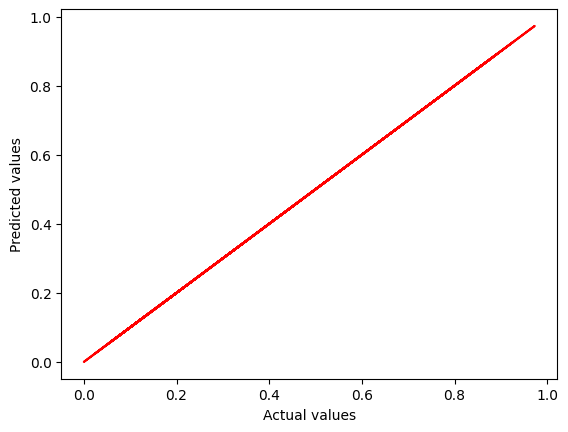

In [14]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df.drop('Close', axis=1), df['Close'], test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Convert the y_train column to a DatetimeIndex

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print('R-squared score:', score)

# Plot the predicted values vs. actual values
plt.plot(y_test, y_pred, color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# Evaluation

In [15]:
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [17]:
print("Training R-squared: ",round(metrics.r2_score(y_train,y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(y_train,y_train_pred),2))
print('Training MAPE:', round(get_mape(y_train,y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(y_train,y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(y_train,y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(y_val,y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(y_val,y_val_pred),2))
print('Validation MAPE:', round(get_mape(y_val,y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(y_train,y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(y_val,y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(y_test,y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(y_test,y_test_pred),2))
print('Test MAPE:', round(get_mape(y_test,y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(y_test,y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(y_test,y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.0
Training Mean Squared Error: 0.0
Training RMSE:  0.0
Training MAE:  0.0
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.0
Validation Mean Squared Error: 0.0
Validation RMSE:  0.0
Validation MAE:  0.0
 
Test R-squared:  1.0
Test Explained Variation:  1.0
Test MAPE: inf
Test Mean Squared Error: 0.0
Test RMSE:  0.0
Test MAE:  0.0


<ipython-input-15-52ba13ad17de>:6: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
